#Task 13.2 (shape detection)

# import important libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



#load the image and convert it to gray scale

In [ ]:
image = cv2.imread('test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# create mask for yellow colour (solve yellow colour problem)

In [ ]:

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)


yellow_edges = cv2.Canny(mask_yellow, 50, 150)
edges = cv2.Canny(gray, 50, 150)


combined_edges = cv2.bitwise_or(edges, yellow_edges)

#Find contours

In [ ]:
contours, _ = cv2.findContours(combined_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Function to classify shape based on the number of edges

In [ ]:
def classify_shape(contour):

    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:

        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "Square"
        else:

            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            return "Rectangle"
    else:

        area = cv2.contourArea(contour)
        if area == 0:
            return "Unknown"
        circularity = (4 * np.pi * area) / (perimeter * perimeter)
        if circularity > 0.8:
            return "Circle"
        return "Unknown"

# Loop through each contour and classify the shape

In [ ]:

for contour in contours:
    shape = classify_shape(contour)


    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Draw the contour and the shape name
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

<ipython-input-96-8e88cd1215fa>:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


# Display the result

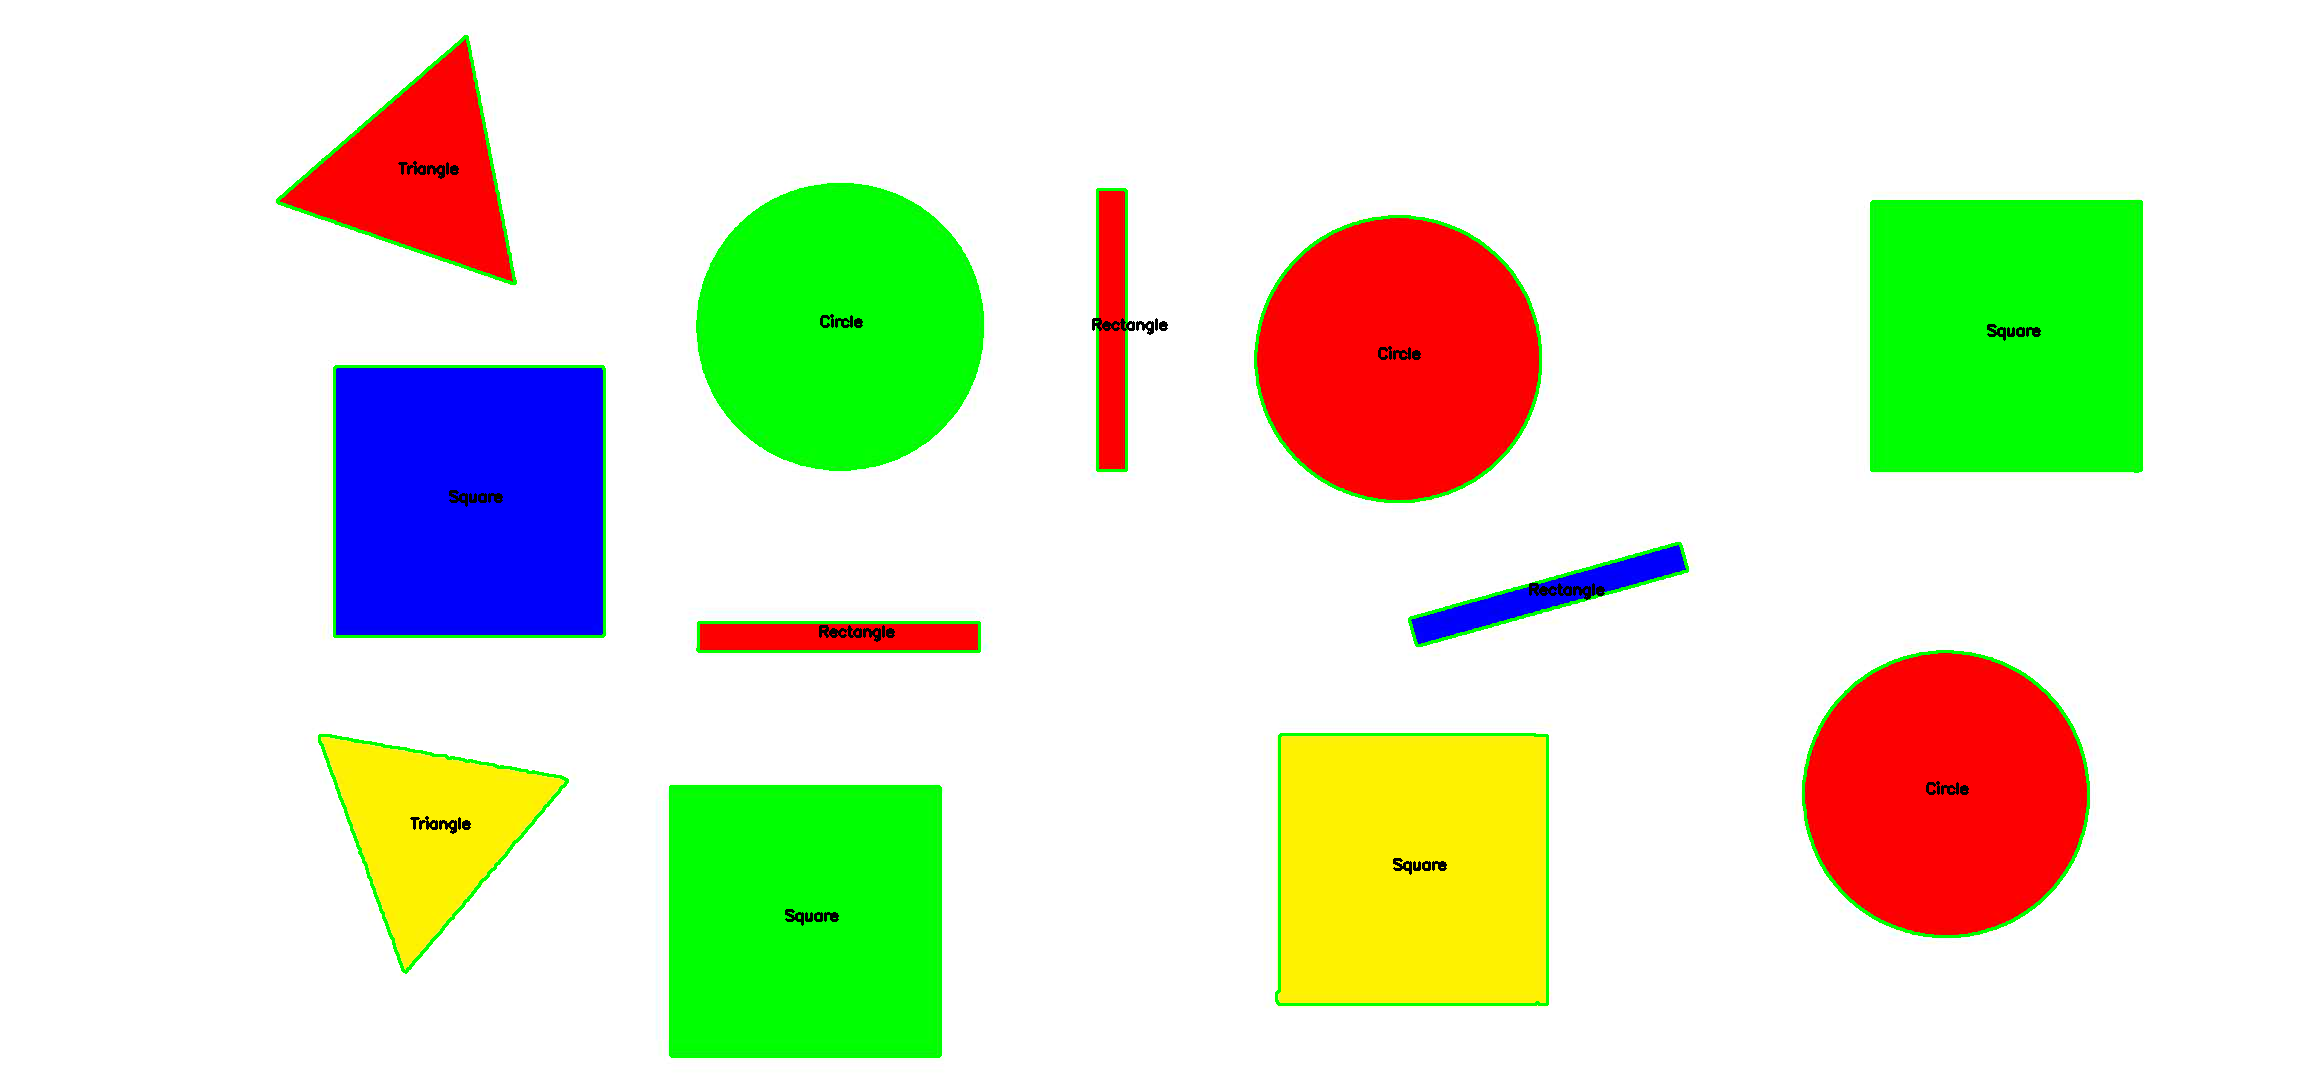

In [ ]:
cv2_imshow(image)

#task 13.2 (colour identification)

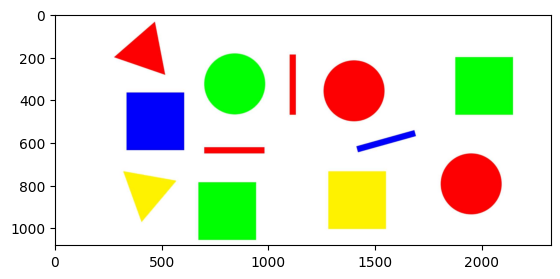

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('test.jpg')
if img is None:
    print("Error: Image file not found.")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
def color_detection(img,lower_bound,upper_bound):
    mask = np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)
    first = img[:,:,0]
    second = img[:,:,1]
    third = img[:,:,2]
    for i in range(rgb_img.shape[0]):
        for j in range(rgb_img.shape[1]):
            if (first[i,j] >= lower_bound[0] and first[i,j] <= upper_bound[0]) and (second[i,j] >= lower_bound[1] and second[i,j] <= upper_bound[1]) and (third[i,j] >= lower_bound[2] and third[i,j] <= upper_bound[2]):
                mask[i,j] = 255
            else:
                mask[i,j] = 0
    return mask

RGB

In [ ]:
#lower and upper bounds for the yellow color range
lower_bound_y = np.array([100, 100, 0], dtype=np.uint8)
upper_bound_y = np.array([255, 255, 30], dtype=np.uint8)

## Bounds red color in rgb
lower_bound_r = np.array([50, 0, 0], dtype=np.uint8)  # Lower bound for red
upper_bound_r = np.array([255, 100, 100], dtype=np.uint8)

## Bounds of blue color in rgb
lower_bound_b = np.array([0, 0, 50], dtype=np.uint8)  # Lower bound for blue
upper_bound_b = np.array([100, 100, 255], dtype=np.uint8)

HSV


In [ ]:
lower_red = [0,150,50]

upper_red = [10,255,255]


lower_green = [45,150,50]

upper_green = [65,255,255]

lower_yellow = [25,150,50]

upper_yellow = [35,255,255]


lower_dark_blue = [115,150,0]

upper_dark_blue = [125,255,255]

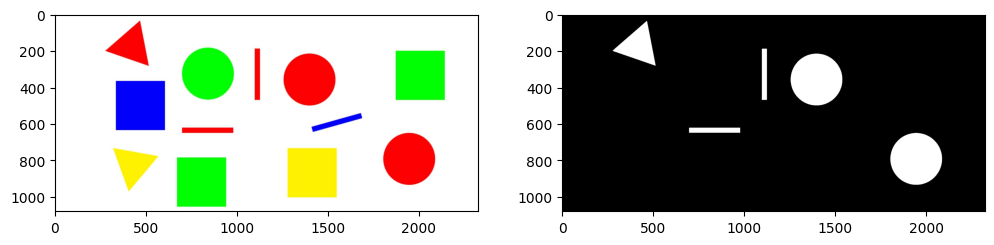

In [ ]:
red_mask=color_detection(rgb_img,lower_bound_r,upper_bound_r)
green_mask=color_detection(HSV_img,lower_green,upper_green)
yellow_mask=color_detection(HSV_img,lower_yellow,upper_yellow)
blue_mask=color_detection(HSV_img,lower_dark_blue,upper_dark_blue)
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
axarr[0].imshow(rgb_img)
axarr[1].imshow(red_mask,cmap="gray")

In [ ]:
colors_and_masks = [('Red', red_mask), ('Green', green_mask), ('Blue', blue_mask), ('Yellow', yellow_mask)]

# Draw text on the original image
for color_name, mask in colors_and_masks:
    # Find contours for each color
    contours_1, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours_1:
        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)
        # Calculate the center of the bounding box
        center_x = x + w // 2
        center_y = y + h // 2
        # Add text to the original image
        cv2.putText(rgb_img, color_name, (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,0),2)

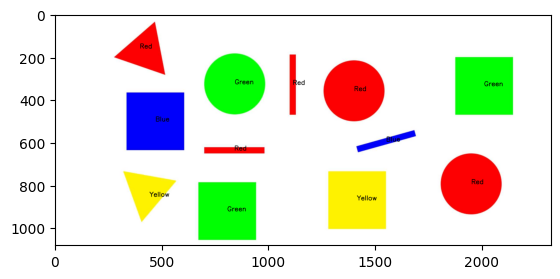

In [ ]:
plt.imshow(rgb_img)

#**Merge the 2 tasks together**

<ipython-input-96-8e88cd1215fa>:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


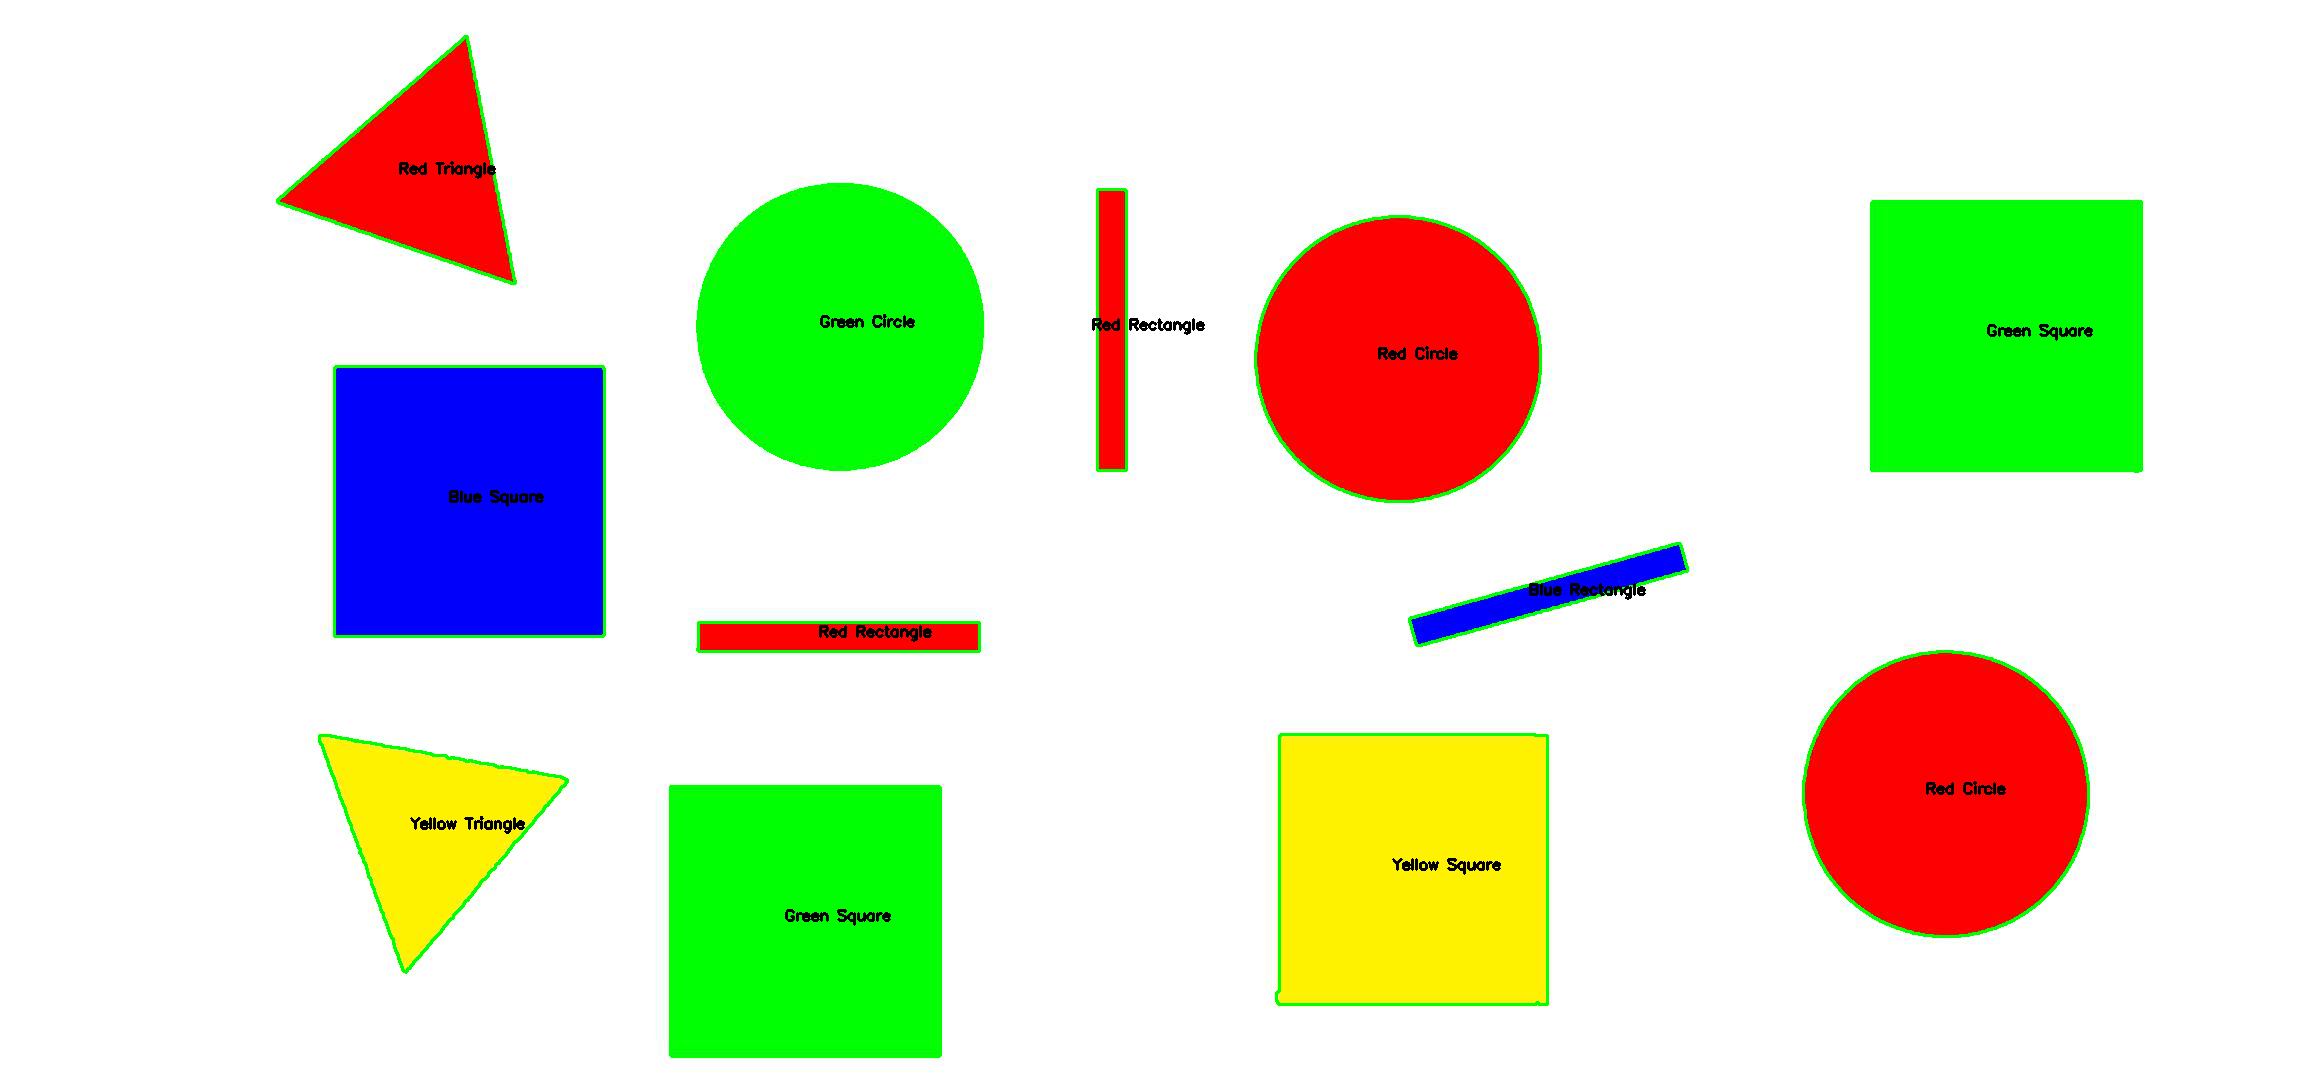

In [ ]:
image = cv2.imread('test.jpg')
colors_and_masks = [('Red', red_mask), ('Green', green_mask), ('Blue', blue_mask), ('Yellow', yellow_mask)]
# Loop through detected contours (shapes)
for contour in contours:
    shape = classify_shape(contour)


    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Detect the color at the center of the shape by checking the masks
    color = "Unknown"
    for color_name, mask in colors_and_masks:
        if mask[cY, cX] == 255:
            color = color_name
            break

    # Ensure we write text only once, without repetition
    if color != "Unknown" and shape != "Unknown":
        label = f"{color} {shape}"

        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        cv2.putText(image, label, (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


cv2_imshow(image)
